# SVM(Support Vector  Machine)-multi class

### it is both for regression and also for classification
### for classication its SVC
#### RBF(radial Basis Function),POLYNOMIAL

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
import pandas as pd
mpl.style.use('classic')

In [3]:
df=pd.DataFrame({'sleep_proportion':[0.2,0.4,0.5,0.7,0.8,0.6],
                'grumpy_proportion':[0.1,0.6,0.2,0.9,0.9,0.7],
                 'prediction':['kitten','kitten','kitten','adult','adult','adult']})
# df=pd.DataFrame({'sleep_proportion':[0.2,0.4,0.5,0.7],
#                 'grumpy_proportion':[0.1,0.6,0.2,0.9],
#                  'prediction':['kitten','kitten','kitten','adult']})
df.head()
df

,sleep_proportion,grumpy_proportion,prediction
0,0.2,0.1,kitten
1,0.4,0.6,kitten
2,0.5,0.2,kitten
3,0.7,0.9,adult
4,0.8,0.9,adult
5,0.6,0.7,adult


In [4]:
kat=df[df['prediction']=='kitten']
cat=df[df['prediction']=='adult']

In [5]:
df['bprediction'] = df['prediction'].apply(lambda x: x=='kitten')
df

,sleep_proportion,grumpy_proportion,prediction,bprediction
0,0.2,0.1,kitten,True
1,0.4,0.6,kitten,True
2,0.5,0.2,kitten,True
3,0.7,0.9,adult,False
4,0.8,0.9,adult,False
5,0.6,0.7,adult,False


In [21]:
from sklearn.svm  import SVC
SVCClassifier = SVC(kernel='linear',C=10,max_iter=10)
SVCModel= SVCClassifier.fit(df[['sleep_proportion','grumpy_proportion']]\
                           ,df['bprediction'])

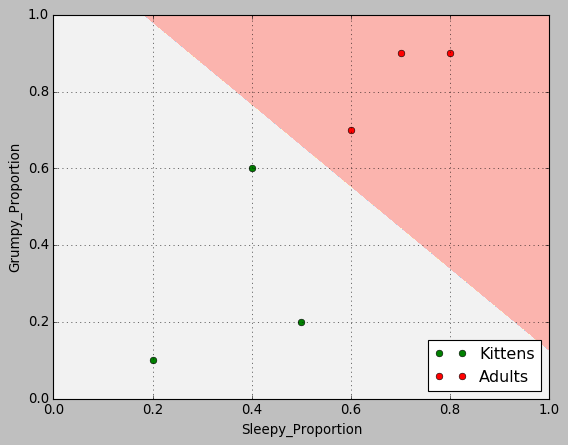

In [22]:
import numpy as np
#Refrence of our mapping
plt.plot(kat["sleep_proportion"],kat["grumpy_proportion"],'og',label='Kittens',alpha=1)
plt.plot(cat["sleep_proportion"],cat["grumpy_proportion"],'or',label='Adults')
plt.axis([0,1,0,1])
plt.xlabel("Sleepy_Proportion")
plt.ylabel("Grumpy_Proportion")
plt.grid()
plt.legend(loc=4)
x_min,x_max=0,1
y_min,y_max=0,1
ary1= np.arange(x_min,x_max,0.001)
ary2= np.arange(y_min,y_max,0.001)

#MESH GRID
xx,yy=np.meshgrid(ary1,ary2)
xx_lin=xx.ravel()
yy_lin=yy.ravel()
c_xy=np.c_[xx_lin,yy_lin]#combining xx and yy
z = SVCModel.predict(c_xy)#predict the range of predictions
z=z.reshape(xx.shape)#reshaping  as the shape of xx

#Contour fills the area. It requires 2 dim array
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)

In [23]:
print(SVCModel.predict([[0.2,0.1],[0.6,0.8]]))

[ True False]
